## Observations and Insights

1)Capomulin is the strongest drug regimen (will reduce tumor growth best)

2)Mouse weight and tumor volume are correlated, which may interfear with the drug regimens effectivness

3)Infubinol contained an outliar (reduced tumor growth, instead of increased tumor volume )


## Dependencies and starter code

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [17]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [18]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.00,0
1,f932,0,45.00,0
2,g107,0,45.00,0
3,a457,0,45.00,0
4,c819,0,45.00,0


In [19]:
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


## Summary statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
#tumor volume for each regimen

grouped_df = merged_df.groupby(["Drug Regimen"])

mean = grouped_df["Tumor Volume (mm3)"].mean()

median = grouped_df["Tumor Volume (mm3)"].median()

variance = grouped_df["Tumor Volume (mm3)"].var()

std = grouped_df["Tumor Volume (mm3)"].std()

sem = grouped_df["Tumor Volume (mm3)"].sem()

Summary_Table = pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"Standard Deviation":std,
                              "Standard Error Mean":sem
                             }
                            )


pd.options.display.float_format = '{:.2f}'.format

display(Summary_Table)


,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

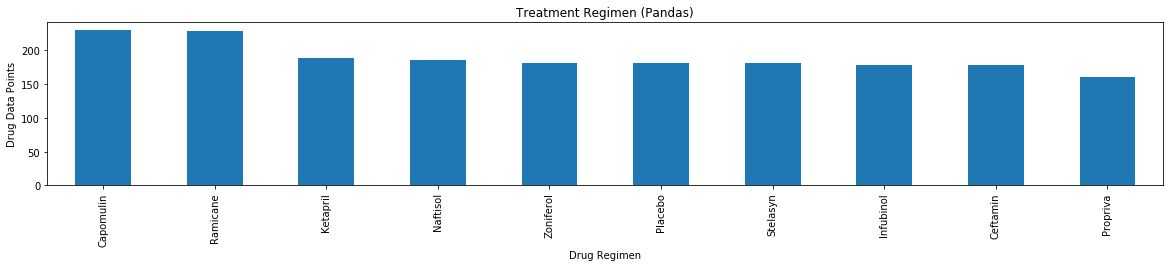

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Use DataFrame.plot() in order to create a bar chart of the data

drug_df = merged_df["Drug Regimen"].value_counts()

drug_df.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Treatment Regimen (Pandas)")
plt.xlabel("Drug Regimen")
plt.ylabel("Drug Data Points")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

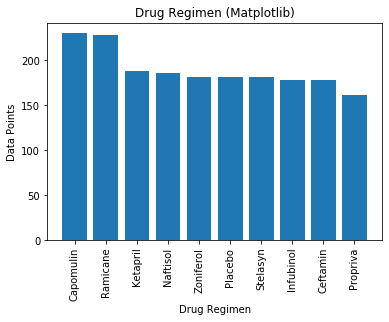

In [22]:
counts = merged_df['Drug Regimen'].value_counts()

plt.bar(counts.index.values,counts.values,align="center")

plt.xticks(rotation="vertical")


plt.title("Drug Regimen (Matplotlib)")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

## Pie plots

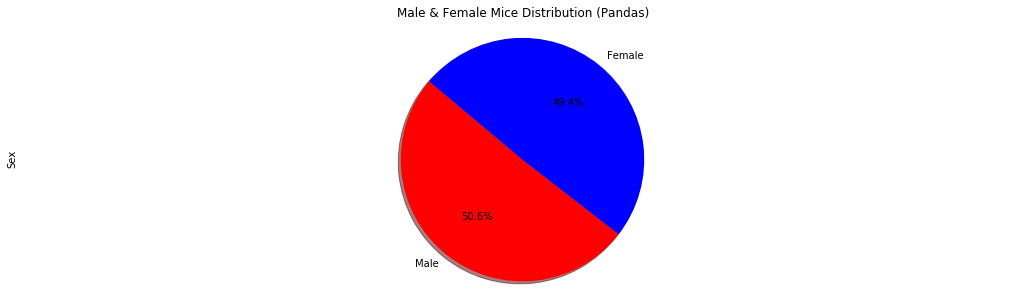

<Figure size 432x288 with 0 Axes>

In [23]:
#REMOVE SEX 

# Generate a pie plot showing the distribution of female versus male mice using pandas

merged_df['Sex'].value_counts().plot(kind="pie", figsize=(18,5), autopct="%1.1f%%", colors= ["Red","Blue"],shadow=True, startangle=140)

# Set a title for the chart
plt.title("Male & Female Mice Distribution (Pandas)")
plt.axis("equal")
plt.show()
plt.tight_layout()


Male      958
Female    935
Name: Sex, dtype: int64


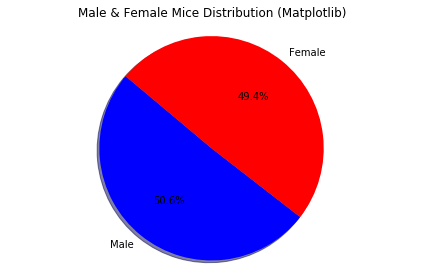

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_values = merged_df['Sex'].value_counts()

print(gender_values)

labels = ["Male","Female"]

colors = ["Blue","Red"]

plt.pie(gender_values, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Male & Female Mice Distribution (Matplotlib)")
plt.tight_layout()



## Quartiles, outliers and boxplots

In [25]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Capomulin, Ramicane, Infubinol, and Ceftamin.

new_df = pd.DataFrame(mean)
Qrt_df = new_df.loc[["Capomulin","Ramicane", "Infubinol","Ceftamin"]]


#Calculate the quartiles 
#and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.


quartiles = Qrt_df.quantile([.25,.5,.75])

quartiles
#Qrt_df.astype('int64')#.dtypes

lowerq = quartiles.quantile(.25)
upperq = quartiles.quantile(0.75)
iqr = upperq-lowerq


print(f"The lower quartile of regimens is: {lowerq} ")

print(f"The upper quartile ofregimensx is: {upperq}")

print(f"The interquartile range of regimens is: {iqr}")

print(f"The the median of regimens is: {quartiles.quantile(0.5)}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of regimens is: Tumor Volume (mm3)   43.60
Name: 0.25, dtype: float64 
The upper quartile ofregimensx is: Tumor Volume (mm3)   49.65
Name: 0.75, dtype: float64
The interquartile range of regimens is: Tumor Volume (mm3)   6.05
dtype: float64
The the median of regimens is: Tumor Volume (mm3)   46.63
Name: 0.5, dtype: float64
Values below Tumor Volume (mm3)   34.52
dtype: float64 could be outliers.
Values above Tumor Volume (mm3)   58.73
dtype: float64 could be outliers.


In [26]:
Qrt_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.68
Ramicane,40.22
Infubinol,52.88
Ceftamin,52.59


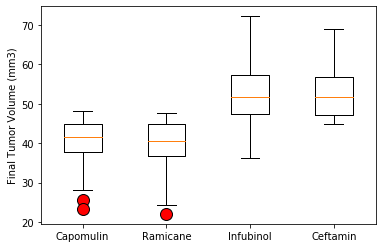

In [39]:
#dataframe not series, boxplot pandasdf

#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens 

#highlight any potential outliers in the plot by changing their color and style.

#Hint: All four box plots should be within the same figure

Capomulin = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
Ramicane = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
Infubinol = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
Ceftamin = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']


orange = dict(markerfacecolor='red',markersize=12)
plt.boxplot([Capomulin,Ramicane,Infubinol,Ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and scatter plots

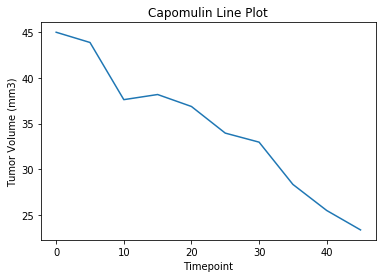

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#conditionals use multiple equal signs

Capomulin_df = merged_df.loc[merged_df["Drug Regimen"]=="Capomulin"]

Capomulin_df

sub_capomulin = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="s185"]

sub_capomulin
                
    

plt.plot(sub_capomulin["Timepoint"],sub_capomulin["Tumor Volume (mm3)"])
plt.title("Capomulin Line Plot")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

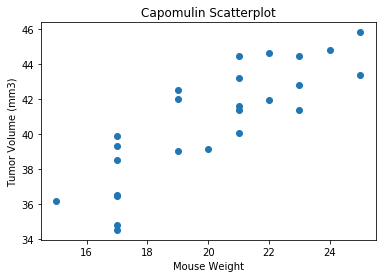

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter_group = Capomulin_df.groupby(["Mouse ID"]).mean()
scatter_group

plt.scatter(scatter_group["Weight (g)"],scatter_group["Tumor Volume (mm3)"])
plt.title("Capomulin Scatterplot")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)


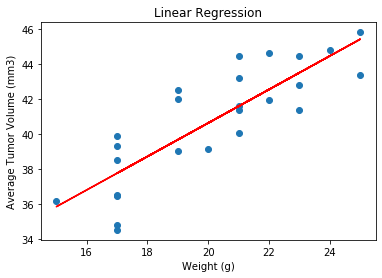

In [30]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(scatter_group['Weight (g)'],scatter_group['Tumor Volume (mm3)'])[0],2)
#the end is formatting 

print(f"The correlation between mouse weight and the average tumor volume is {corr}")

model = st.linregress(scatter_group['Weight (g)'],scatter_group['Tumor Volume (mm3)'])

print(model)

y_values = scatter_group['Weight (g)']*model[0]+model[1]


plt.scatter(scatter_group['Weight (g)'],scatter_group['Tumor Volume (mm3)'])
plt.plot(scatter_group['Weight (g)'],y_values,color="red")
plt.title("Linear Regression")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()